In [271]:
from simulation.rotor import MagneticBearing3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [272]:
env = MagneticBearing3D()

In [273]:
env.reset()
env.state

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [274]:
1/env.dt

30000.0

In [290]:
def sin_excit(i, dt, freq, **kwargs):
    return np.sin(2*np.pi*freq*i*dt)*1

def varredura(i, dt, T0, **kwargs):
    t = i*dt
    f1 = 5
    f2 = 80
    f = t/T0*(f2 - f1) + f1
    return 2*np.sin(2*np.pi*f*t)

In [291]:
obs_history = []
env.reset()
env.gravity=0
k = 4300
c= 43
env.K = np.array([[k, k/10],
                 [-k/10, k]])
env.C = np.array([[c, 0],
                 [0, c]])

freq = 5
f_history = []

force_fun = sin_excit

total_steps = 0.5/env.dt
print("Total = ", total_steps)
for i in range(int(total_steps)):
    print(i, end="\r")
    f = force_fun(i, env.dt, freq=freq, T0=0.25)
    f_history.append(f)
    obs, done = env.step(action=(f, 0, f, 0))
    #print(obs)
    obs_history.append(obs)
    if done:
        break
obs_history = np.array(obs_history)

Total =  3030.3030303030305


In [292]:
r, g, b = matplotlib.colors.to_rgb("blue")

In [293]:
obs_history = np.array(obs_history)
len(obs_history)

3030

In [294]:
f

0.006754372846667813

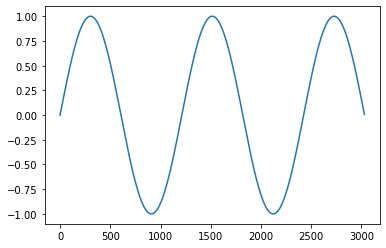

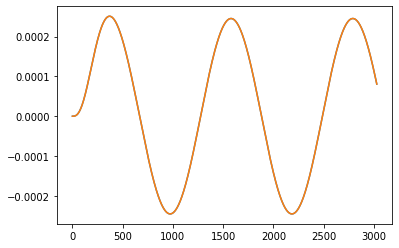

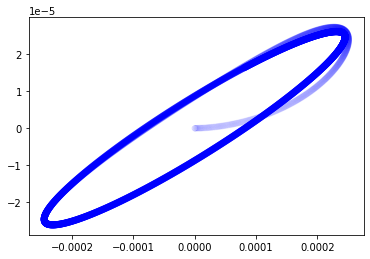

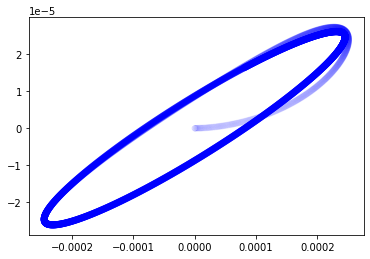

In [295]:
colors = [ (r,g,b, i/len(obs_history)/2) for i in range(len(obs_history))]
plt.plot(f_history)
plt.show()
plt.plot(obs_history[:, 0])
plt.plot(obs_history[:, 2])
plt.show()
plt.scatter(obs_history[:, 0], obs_history[:, 1], c=colors)
plt.show()
plt.scatter(obs_history[:, 2], obs_history[:, 3], c=colors)
plt.show()

In [296]:
from scipy import fft

<ipython-input-297-c0ca969402a9>:2: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(np.abs(fft(f_history)))


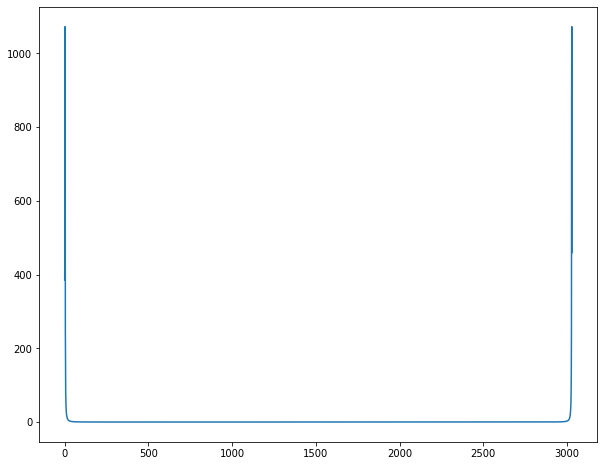

In [297]:
plt.figure(figsize=(10, 8))
plt.plot(np.abs(fft(f_history)))

In [298]:
env.reset()
env.dt = 0.000165
env.gravity=0
k = 4300
c= 43
env.K = np.array([[k, k/10],
                 [-k/10, k]])
env.C = np.array([[c, 0],
                 [0, c]])


def run_once(env, T, freq, axis="x"):
    
    total_steps = T/env.dt
    print("Total = ", total_steps)
    
    data = {"ax":[],
            "ay":[],
            "bx":[],
            "by":[],
            "fa":[],
            "fb":[],
            "t" :[]}
    
    for i in range(int(total_steps)):
        print(i, end="\r")
        f  = sin_excit(i=i, dt=env.dt, freq=freq)
        
        data["fa"].append(f)
        data["fb"].append(f)
        action = (f, 0, f, 0) if axis=="x" else (0, f, 0, f)
        obs, done = env.step(action=action)
        
        data["ax"].append(obs[0])
        data["ay"].append(obs[1])
        data["bx"].append(obs[2])
        data["by"].append(obs[3])
        data["t"].append(i*env.dt)
        if done:
            print("ATTENTION! DONE")
            break
    
    df = pd.DataFrame(data)
    df["freq"] = freq
    return df
    
    
def create_data_sin(env,
                    T=0.05,
                    freqs = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]):
    all_data = pd.DataFrame()
    
    
    for freq in freqs:
        for axis in "x", "y":
            env.reset()
            df = run_once(env,
                         T,
                         freq,
                         axis=axis)
            all_data = pd.concat([all_data, df], ignore_index=True)
    return all_data


#run_once(env, 0.01, freq=20)
df = create_data_sin(env,
                T=7)

Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424
Total =  42424.242424242424


In [299]:
df

,ax,ay,bx,by,fa,fb,t,freq
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,5
1,1.411236e-10,0.000000e+00,1.411236e-10,0.000000e+00,0.005184,0.005184,0.000165,5
2,7.035953e-10,1.652099e-15,7.035953e-10,1.652099e-15,0.010367,0.010367,0.000330,5
3,1.963586e-09,1.316948e-14,1.963586e-09,1.316948e-14,0.015550,0.015550,0.000495,5
4,4.193197e-09,5.574571e-14,4.193197e-09,5.574571e-14,0.020733,0.020733,0.000660,5
...,...,...,...,...,...,...,...,...
848475,-6.031485e-08,-9.695212e-07,-6.031485e-08,-9.695212e-07,-0.268415,-0.268415,6.999135,50
848476,-6.997353e-08,-2.077231e-06,-6.997353e-08,-2.077231e-06,-0.218143,-0.218143,6.999300,50
848477,-7.944423e-08,-3.179361e-06,-7.944423e-08,-3.179361e-06,-0.167285,-0.167285,6.999465,50
848478,-8.870151e-08,-4.272949e-06,-8.870151e-08,-4.272949e-06,-0.115977,-0.115977,6.999630,50


In [300]:
df.to_csv("simulation/data_sin.csv")